In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port elizabeth za
saint-philippe re
souillac mu
hailey us
tura ru
ancud cl
belushya guba ru
hermanus za
port elizabeth za
kununurra au
mataura pf
marcona pe
hobart au
meiganga cm
shingu jp
honiara sb
illoqqortoormiut gl
serramanna it
mar del plata ar
kribi cm
luau ao
qaanaaq gl
esperance au
norman wells ca
rikitea pf
port alfred za
yarke pole ua
illoqqortoormiut gl
spornoye ru
muros es
illoqqortoormiut gl
necochea ar
saryozek kz
ilulissat gl
bereda so
nanortalik gl
turan ru
castro cl
ust-tsilma ru
pisco pe
mataura pf
pedernales ec
vao nc
rikitea pf
georgetown sh
albany au
puerto ayora ec
aras no
torbay ca
esperance au
ushuaia ar
launceston au
cordoba ar
cayenne gf
hihifo to
portobelo pa
bambous virieux mu
zapolyarnyy ru
bambous virieux mu
nizhneyansk ru
lembeni tz
jardanhaza hu
albany au
mayahi ne
kruisfontein za
zyryanka ru
sisimiut gl
busselton au
lolua tv
kapaa us
dikson ru
tsihombe mg
rockhampton au
khatanga ru
rikitea pf
hobart au
punta arenas cl
baloda bazar in
rikitea pf
hermanu

arraial do cabo br
hermanus za
kavieng pg
alofi nu
thunder bay ca
airai pw
ginir et
bambous virieux mu
nantucket us
port alfred za
jinchang cn
mataura pf
kabo cf
punta arenas cl
brae gb
provideniya ru
omboue ga
prabumulih id
taolanaro mg
rudsar ir
albany au
pisco pe
pacific grove us
laguna br
gornopravdinsk ru
san vicente ph
punta arenas cl
mataura pf
nouadhibou mr
naryan-mar ru
busselton au
egvekinot ru
punta arenas cl
laredo us
georgetown sh
souillac mu
mataura pf
castro cl
cape town za
namatanai pg
acarau br
mataura pf
buala sb
roald no
ilulissat gl
rikitea pf
jamestown sh
castro cl
namibe ao
codrington ag
port elizabeth za
villafranca de los barros es
busselton au
narsaq gl
tautira pf
vinh vn
yulara au
atuona pf
ponta do sol cv
hasaki jp
metro id
salinopolis br
albany au
evensk ru
lompoc us
komsomolskiy ru
flin flon ca
cidreira br
entre rios bo
cidreira br
kapaa us
severo-yeniseyskiy ru
jamestown sh
bethel us
porto walter br
hasaki jp
toamasina mg
rafraf tn
chokurdakh ru
severo-kur

chuy uy
ushuaia ar
ciras af
anshun cn
dalbandin pk
rikitea pf
rikitea pf
byron bay au
hobart au
makuyuni tz
dikson ru
louisbourg ca
rikitea pf
caraballeda ve
labutta mm
punta arenas cl
abiy adi et
scottsburgh za
general roca ar
upernavik gl
hobart au
amderma ru
atuona pf
grand-santi gf
provideniya ru
mataura pf
vaini to
bredasdorp za
hobart au
daigo jp
sitka us
georgetown sh
norman wells ca
benemerito de las americas mx
castro cl
marsh harbour bs
alyangula au
lincoln nz
nikolskoye ru
dunedin nz
tsihombe mg
cape town za
esperance au
collinsville us
vaitupu wf
fairbanks us
laguna br
busselton au
aykhal ru
coquimbo cl
atikokan ca
barentsburg sj
zyryanka ru
nizhneyansk ru
sumbawa id
vaitupu wf
ballangen no
ushuaia ar
coihaique cl
sile tr
rikitea pf
nanortalik gl
vung tau vn
koslan ru
fortuna us
airai pw
punta arenas cl
saint-philippe re
east london za
sao joao da barra br
new norfolk au
puerto ayora ec
port lincoln au
punta arenas cl
ushuaia ar
sovetskiy ru
rikitea pf
taolanaro mg
mar del 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | hailey
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | kununurra
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | marcona
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | meiganga
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | honiara
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | serramanna
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | kribi
Processing Record 20 of Set 1 | luau
Processing Record 21 of Set 1 | qaa

Processing Record 40 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 4 | muswellbrook
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | luoyang
Processing Record 47 of Set 4 | tarudant
City not found. Skipping...
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | evensk
Processing Record 50 of Set 4 | barhi
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | port moresby
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | dali
Processing Rec

Processing Record 29 of Set 8 | porto walter
Processing Record 30 of Set 8 | toamasina
Processing Record 31 of Set 8 | rafraf
Processing Record 32 of Set 8 | abashiri
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | burica
City not found. Skipping...
Processing Record 37 of Set 8 | jizan
Processing Record 38 of Set 8 | faya
Processing Record 39 of Set 8 | utete
Processing Record 40 of Set 8 | makokou
Processing Record 41 of Set 8 | tazovskiy
Processing Record 42 of Set 8 | zomin
Processing Record 43 of Set 8 | ucluelet
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | karlskoga
Processing Record 46 of Set 8 | taperoa
Processing Record 47 of Set 8 | klerksdorp
Processing Record 48 of Set 8 | coos bay
Processing Record 49 of Set 8 | skjervoy
Processing Record 50 of Set 8 | xining
Processing Record 1 of Set 9 | serik
Processing Record 2 of Set 9 | polson
Proces

Processing Record 18 of Set 12 | mountain home
Processing Record 19 of Set 12 | amahai
Processing Record 20 of Set 12 | magadan
Processing Record 21 of Set 12 | ketchikan
Processing Record 22 of Set 12 | cherskiy
Processing Record 23 of Set 12 | cabedelo
Processing Record 24 of Set 12 | neiafu
Processing Record 25 of Set 12 | carballo
Processing Record 26 of Set 12 | sale
Processing Record 27 of Set 12 | el vigia
Processing Record 28 of Set 12 | ola
Processing Record 29 of Set 12 | labrea
Processing Record 30 of Set 12 | rio gallegos
Processing Record 31 of Set 12 | saint-augustin
Processing Record 32 of Set 12 | santa cruz
Processing Record 33 of Set 12 | moose factory
Processing Record 34 of Set 12 | la romana
Processing Record 35 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 36 of Set 12 | zhelnino
City not found. Skipping...
Processing Record 37 of Set 12 | gouyave
Processing Record 38 of Set 12 | chor
Processing Record 39 of Set 12 | saurimo
Processing Record 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,61.09,94,0,8.05,ZA,2021-09-27 04:59:32
1,Saint-Philippe,-21.3585,55.7679,75.22,87,79,14.97,RE,2021-09-27 04:59:33
2,Souillac,-20.5167,57.5167,75.36,68,75,19.57,MU,2021-09-27 04:59:33
3,Hailey,43.5196,-114.3153,58.50,30,1,6.93,US,2021-09-27 04:59:34
4,Tura,25.5198,90.2201,89.47,60,24,0.78,IN,2021-09-27 04:59:34
5,Ancud,-41.8697,-73.8203,35.13,81,50,1.97,CL,2021-09-27 04:59:34
6,Hermanus,-34.4187,19.2345,57.90,89,73,3.15,ZA,2021-09-27 04:59:35
7,Kununurra,-15.7667,128.7333,98.58,25,40,11.50,AU,2021-09-27 04:59:35
8,Mataura,-46.1927,168.8643,51.48,40,3,2.19,NZ,2021-09-27 04:59:36
9,Hobart,-42.8794,147.3294,60.66,49,0,1.01,AU,2021-09-27 04:59:36


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2021-09-27 04:59:32,-33.9180,25.5701,61.09,94,0,8.05
1,Saint-Philippe,RE,2021-09-27 04:59:33,-21.3585,55.7679,75.22,87,79,14.97
2,Souillac,MU,2021-09-27 04:59:33,-20.5167,57.5167,75.36,68,75,19.57
3,Hailey,US,2021-09-27 04:59:34,43.5196,-114.3153,58.50,30,1,6.93
4,Tura,IN,2021-09-27 04:59:34,25.5198,90.2201,89.47,60,24,0.78
5,Ancud,CL,2021-09-27 04:59:34,-41.8697,-73.8203,35.13,81,50,1.97
6,Hermanus,ZA,2021-09-27 04:59:35,-34.4187,19.2345,57.90,89,73,3.15
7,Kununurra,AU,2021-09-27 04:59:35,-15.7667,128.7333,98.58,25,40,11.50
8,Mataura,NZ,2021-09-27 04:59:36,-46.1927,168.8643,51.48,40,3,2.19
9,Hobart,AU,2021-09-27 04:59:36,-42.8794,147.3294,60.66,49,0,1.01


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

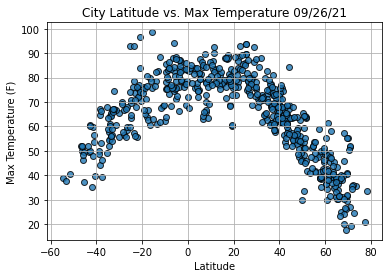

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

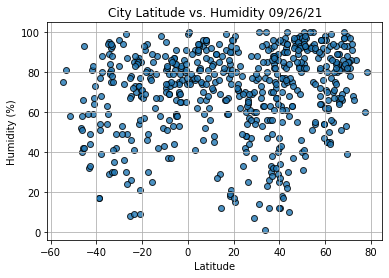

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

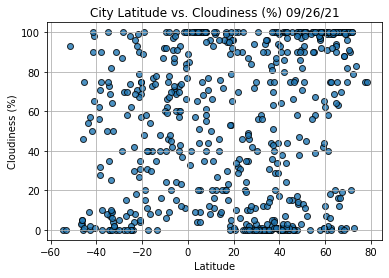

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

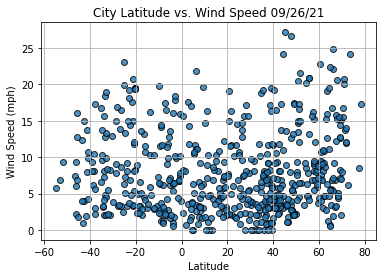

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                   Serramanna
Country                        IT
Date          2021-09-27 04:59:38
Lat                       39.4244
Lng                        8.9244
Max Temp                    72.66
Humidity                       95
Cloudiness                     94
Wind Speed                   6.04
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
567     True
568     True
569    False
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Hailey,US,2021-09-27 04:59:34,43.5196,-114.3153,58.50,30,1,6.93
4,Tura,IN,2021-09-27 04:59:34,25.5198,90.2201,89.47,60,24,0.78
10,Meiganga,CM,2021-09-27 04:59:37,6.5167,14.3000,62.96,93,100,3.44
11,Shingu,JP,2021-09-27 04:59:37,33.7333,135.9833,79.79,77,94,11.79
13,Serramanna,IT,2021-09-27 04:59:38,39.4244,8.9244,72.66,95,94,6.04


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

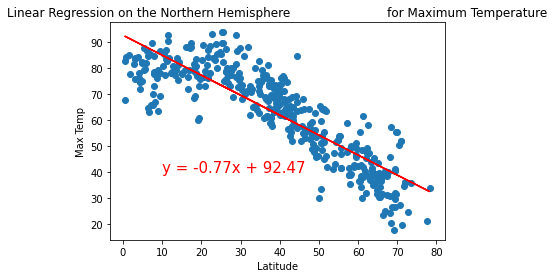

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

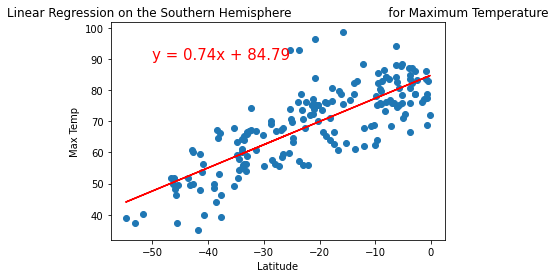

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

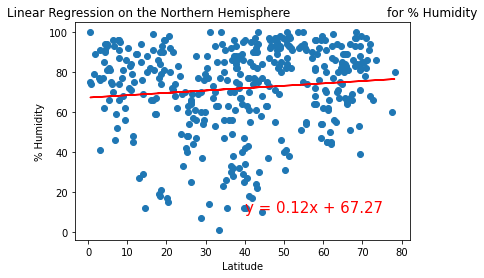

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))